In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras import layers, activations, losses, optimizers

import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

val_ratio = int(X_test.shape[0] * .5)
(X_val, y_val) = X_test[:val_ratio], y_test[:val_ratio]
(X_test, y_test) = X_test[val_ratio:], y_test[val_ratio:]

print(X_train.shape, X_val.shape, X_test.shape)

17464789/17464789 [==============================] - 1s 0us/step
(25000,) (12500,) (12500,)


In [3]:
def encode_reviews(sequence, num_words=10000):
  space = tf.zeros((len(sequence), num_words)).numpy()

  for i, entries in enumerate(sequence):
    space[i, [int(i) for i in entries]] = 1

  return space

num_words = 10000

X_train = encode_reviews(X_train, num_words=num_words)
X_val = encode_reviews(X_val, num_words=num_words)
X_test = encode_reviews(X_test, num_words=num_words)

print(X_train.shape, X_val.shape, X_test.shape)

(25000, 10000) (12500, 10000) (12500, 10000)


In [4]:
inputs = layers.Input(X_train.shape[1:])

x = layers.Dense(X_train.shape[1])(inputs)
x = layers.BatchNormalization()(x)
x = activations.relu(x)

x = layers.Dense(256)(x)
x = layers.BatchNormalization()(x)
x = activations.relu(x)

x = layers.Dense(8)(x)
x = layers.BatchNormalization()(x)
x = activations.relu(x)

outputs = layers.Dense(1, activation='sigmoid')(x)

In [5]:
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10000)]           0         
                                                                 
 dense (Dense)               (None, 10000)             100010000 
                                                                 
 batch_normalization (Batch  (None, 10000)             40000     
 Normalization)                                                  
                                                                 
 tf.nn.relu (TFOpLambda)     (None, 10000)             0         
                                                                 
 dense_1 (Dense)             (None, 256)               2560256   
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                            

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=250, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
100/100 [==============================] - 15s 66ms/step - loss: 0.4624 - accuracy: 0.8499 - val_loss: 0.4934 - val_accuracy: 0.7863
Epoch 2/10
100/100 [==============================] - 5s 54ms/step - loss: 0.3020 - accuracy: 0.9527 - val_loss: 0.4997 - val_accuracy: 0.7930
Epoch 3/10
100/100 [==============================] - 6s 56ms/step - loss: 0.2134 - accuracy: 0.9771 - val_loss: 0.3871 - val_accuracy: 0.8614
Epoch 4/10
100/100 [==============================] - 6s 59ms/step - loss: 0.1483 - accuracy: 0.9915 - val_loss: 0.4069 - val_accuracy: 0.8580
Epoch 5/10
100/100 [==============================] - 6s 58ms/step - loss: 0.1047 - accuracy: 0.9956 - val_loss: 0.4026 - val_accuracy: 0.8626
Epoch 6/10
100/100 [==============================] - 5s 54ms/step - loss: 0.0759 - accuracy: 0.9971 - val_loss: 0.3883 - val_accuracy: 0.8617
Epoch 7/10
100/100 [==============================] - 6s 61ms/step - loss: 0.0637 - accuracy: 0.9943 - val_loss: 0.5070 - val_accuracy: 0.854

In [7]:
hist = history.history
hist.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

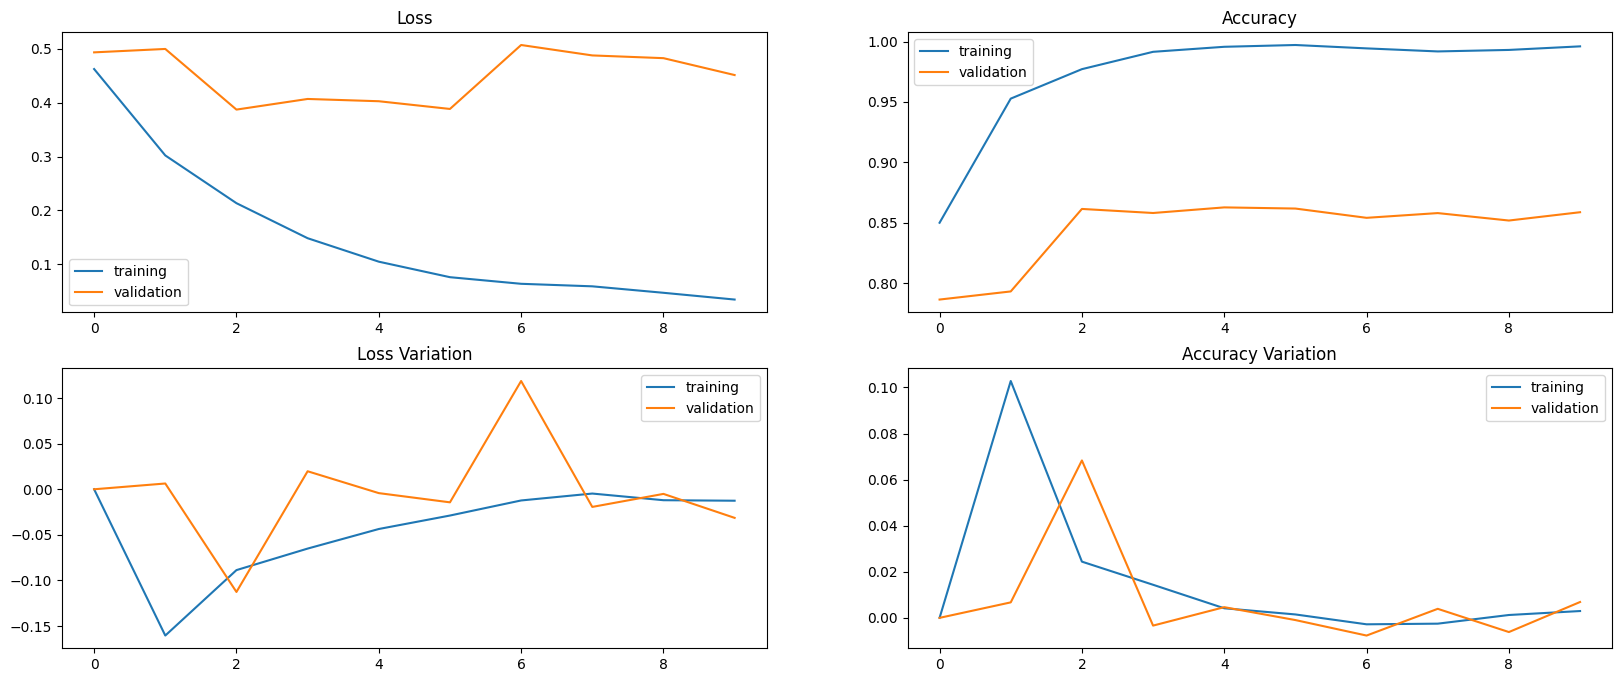

In [8]:
def compute_req(seq):
  return [0] + [(seq[i] - seq[i-1]) for i in range(1, len(seq))]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,8))
x = list(range(len(hist['loss'])))

ax1.plot(x, hist['loss'], label='training')
ax1.plot(x, hist['val_loss'], label='validation')
ax1.set_title('Loss')
ax1.legend()

ax2.plot(x, hist['accuracy'], label='training')
ax2.plot(x, hist['val_accuracy'], label='validation')
ax2.set_title('Accuracy')
ax2.legend()


ax3.plot(x, compute_req(hist['loss']), label='training')
ax3.plot(x, compute_req(hist['val_loss']), label='validation')
ax3.set_title('Loss Variation')
ax3.legend()

ax4.plot(x, compute_req(hist['accuracy']), label='training')
ax4.plot(x, compute_req(hist['val_accuracy']), label='validation')
ax4.set_title('Accuracy Variation')
ax4.legend()

plt.show()

In [9]:
model.evaluate(X_test, y_test)

391/391 [==============================] - 2s 5ms/step - loss: 0.4441 - accuracy: 0.8608


[0.4441412091255188, 0.86080002784729]

In [10]:
y_pred = (model.predict(X_test).flatten() > .5).astype('int32')

391/391 [==============================] - 2s 4ms/step


In [11]:
print(y_pred[:30])
print(y_test[:30])

[0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1]
[0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1]
